In [2]:
import pandas as pd
import matplotlib.pyplot as plt#these were all libraries used inorder to acheive our desired output
import numpy as np

In [3]:
train = pd.read_csv('twitter_training.csv')#here we r loading the training dataset
valid= pd.read_csv('twitter_training.csv')#and here we are loading the validation dataset

In [4]:
column_name = ['tweet-id', 'entity', 'sentiment', 'content']#now,we are re-naming the columns for our readability
train.columns=column_name
valid.columns=column_name
t=pd.concat([train,valid],ignore_index=False)
t.head()#this line helps us to display the first few rows of the dataset

,tweet-id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
t.columns.tolist()#here,this statement allows us to convert dataframe into list

['tweet-id', 'entity', 'sentiment', 'content']

In [6]:
t.info()#it processes the information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 149362 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet-id   149362 non-null  int64 
 1   entity     149362 non-null  object
 2   sentiment  149362 non-null  object
 3   content    147990 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.7+ MB


In [7]:
t.isnull().sum()#this statement is used inorder clean the data from the dataset which we have uploaded

tweet-id        0
entity          0
sentiment       0
content      1372
dtype: int64

In [8]:
t.duplicated().sum()#used to count the number of duplicate rows in a pandas dataframe

np.int64(77381)

In [9]:
t.dropna(inplace=True)#removes the missing values
t.drop_duplicates(inplace=True)#removes the duplicate rows
print("null:","\n",t.isnull().sum())#prints no.of missing values
print("dup:",t.duplicated().sum())#prints no.of duplicate rows

null: 
 tweet-id     0
entity       0
sentiment    0
content      0
dtype: int64
dup: 0


In [10]:
t.drop(columns=['tweet-id','content'],inplace=True)# removes the specified columns,'tweet-id' and 'content',from the dataframe 

In [11]:
t.head()#displays first few rows

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [12]:
t.info()#displays information 

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     71655 non-null  object
 1   sentiment  71655 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


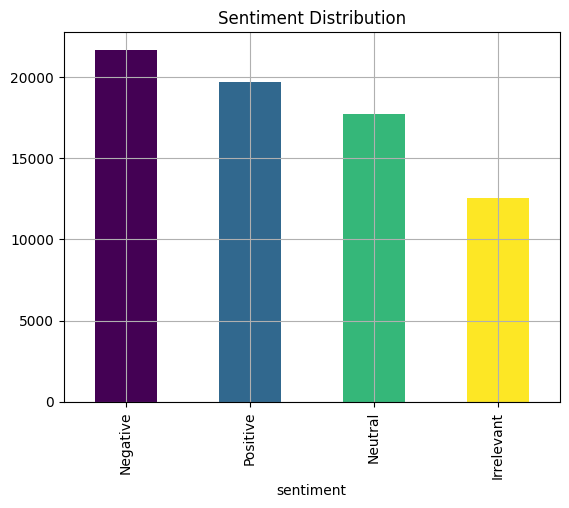

In [13]:
sentiment_content=t['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors=[color(i) for i in np.linspace(0,1,len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)# Plotting the sentiment distribution as a bar chart with colors from the 'viridis' colormap
plt.title('Sentiment Distribution')
plt.show()